In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [2]:
granola = {"Brand" : ["KIND","Paleonola","Nature’s Valley","Purely Elizabeth","Kashi","Cascadian Farm","Quaker"],
          "Price ($)": [6.99,6.29,4.99,6.50,6.75,5.99,6.25],
          "Sugar per serving": [10,12,22,17,16,24,28],
          "Made bestsellers' list?": ["Yes","Yes","No","Yes","No","No","No"]}

In [3]:
df=pd.DataFrame(granola)

In [4]:
df


,Brand,Price ($),Sugar per serving,Made bestsellers' list?
0,KIND,6.99,10,Yes
1,Paleonola,6.29,12,Yes
2,Nature’s Valley,4.99,22,No
3,Purely Elizabeth,6.50,17,Yes
4,Kashi,6.75,16,No
5,Cascadian Farm,5.99,24,No
6,Quaker,6.25,28,No


### 3.Using the Manhattan distance formula, calculate the distance between KIND granola and Nature’s Valley granola.


In [5]:
from math import sqrt

In [6]:
#create function to calculate Manhattan distance 

def manhattan(a, b):
    return sum(abs(num1-num2) for num1, num2 in zip(a,b))


In [7]:
A = df.loc[0,["Price ($)","Sugar per serving"]]
B = df.loc[2,["Price ($)","Sugar per serving"]]




In [8]:
manhattan(A,B)

14.0

### 5.Let’s corroborate the earlier question. Now, calculate the Euclidean Distance between KIND granola and Nature’s Valley granola (round to two decimal places).



In [9]:
#create function to calculate Euclidean distance 

def Euclidean (a, b):
    sum_sq = 0
    for num1, num2 in zip(a,b):
        sum_sq += (num1-num2)**2
    return math.sqrt(sum_sq)



In [10]:
Euclidean(A,B)

12.165525060596439

### 6.Two new granola brands have come to market recently, and our Whole Foods analyst is considering adding them to store inventory next quarter. Use the scatter plot above and the price and sugar data below to estimate whether you think each granola will make the best sellers list based on a KNN model with k = 1 that uses Euclidean distance ('as the crow flies' distance).


### Reproducing the original scatter plot without the new brands

In [11]:
colors = df["Made bestsellers' list?"].map({"Yes": "green", "No": "red","??":"pink"})


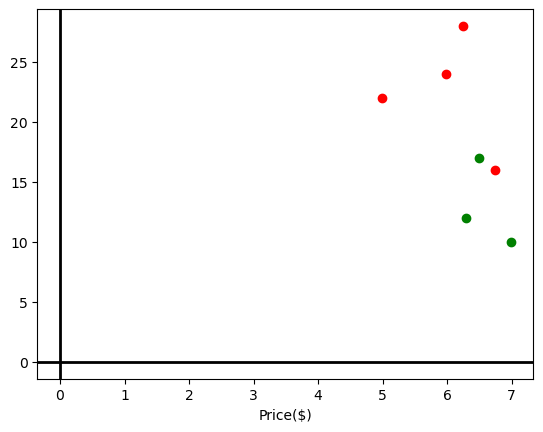

In [12]:
plt.scatter(x=df["Price ($)"][colors == "green"], y=df["Sugar per serving"][colors == "green"], c="green", label="Yes")
plt.scatter(x=df["Price ($)"][colors == "red"], y=df["Sugar per serving"][colors == "red"], c="red", label="No")
plt.axhline(0, color='black', lw=2)
plt.axvline(0, color='black', lw=2)
plt.xlabel("Price($)")
plt.ylabel
plt.show()



### Adding the 2 new brands in the df

In [13]:
new_granolas = pd.DataFrame({"Brand": ["One Degree", "Coconola"], "Price ($)": [6.49, 6.79], "Sugar per serving": [20, 11], "Made bestsellers' list?": ["??", "??"]})
df = pd.concat([df, new_granolas], ignore_index=False)



In [14]:
df

,Brand,Price ($),Sugar per serving,Made bestsellers' list?
0,KIND,6.99,10,Yes
1,Paleonola,6.29,12,Yes
2,Nature’s Valley,4.99,22,No
3,Purely Elizabeth,6.50,17,Yes
4,Kashi,6.75,16,No
5,Cascadian Farm,5.99,24,No
6,Quaker,6.25,28,No
0,One Degree,6.49,20,??
1,Coconola,6.79,11,??


### Plotting the 2 new brands in a different colour in the scatter plot, to have a visual of where the new 2 brands will fall

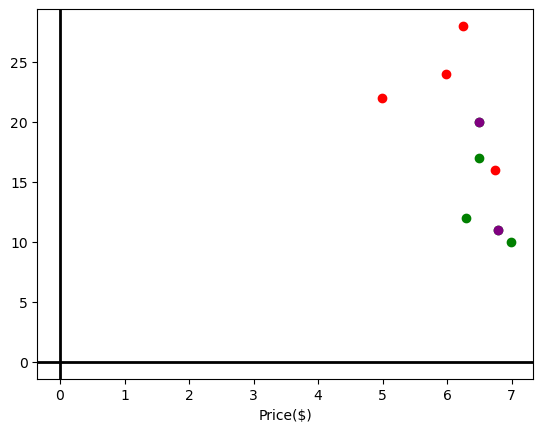

In [16]:
plt.scatter(x=df["Price ($)"][colors == "green"], y=df["Sugar per serving"][colors == "green"], c="green", label="Yes")
plt.scatter(x=df["Price ($)"][colors == "red"], y=df["Sugar per serving"][colors == "red"], c="red", label="No")
plt.scatter(x=df["Price ($)"][df["Made bestsellers' list?"] == "??"], y=df["Sugar per serving"][df["Made bestsellers' list?"] == "??"], c="purple", label="??")
plt.axhline(0, color='black', lw=2)
plt.axvline(0, color='black', lw=2)
plt.xlabel("Price($)")
plt.ylabel
plt.show()


### Calculatin euclidean distance of One Degree Vs all the other brands

In [23]:
from scipy.spatial import distance

# select the features of one degree
one_degree = df[df["Brand"] == "One Degree"][['Price ($)', 'Sugar per serving']]

# calculate the euclidean distance for all other brands
euclidean_distance = []
for i, row in df.iterrows():
    if row["Brand"] != "One Degree":
        euclidean_distance.append(distance.euclidean(one_degree.values[0], [row["Price ($)"], row["Sugar per serving"]]))
    else:
        euclidean_distance.append(np.nan)

# add the new column to the df
df["One Degree Euc"] = euclidean_distance


In [24]:
df

,Brand,Price ($),Sugar per serving,Made bestsellers' list?,One Degree Euc
0,KIND,6.99,10,Yes,10.012492
1,Paleonola,6.29,12,Yes,8.002500
2,Nature’s Valley,4.99,22,No,2.500000
3,Purely Elizabeth,6.50,17,Yes,3.000017
4,Kashi,6.75,16,No,4.008441
5,Cascadian Farm,5.99,24,No,4.031129
6,Quaker,6.25,28,No,8.003599
0,One Degree,6.49,20,??,NaN
1,Coconola,6.79,11,??,9.004999


### Same for Coconola

In [27]:
# select the features of Coconola
coconola = df[df["Brand"] == "Coconola"][['Price ($)', 'Sugar per serving']]

# calculate the euclidean distance for all other brands
euclidean_distance = []
for i, row in df.iterrows():
    if row["Brand"] != "Coconola":
        euclidean_distance.append(distance.euclidean(coconola.values[0], [row["Price ($)"], row["Sugar per serving"]]))
    else:
        euclidean_distance.append(np.nan)

# add the new column to the df
df["Coconola Euc"] = euclidean_distance


In [28]:
df

,Brand,Price ($),Sugar per serving,Made bestsellers' list?,One Degree Euc,Coconola Euc
0,KIND,6.99,10,Yes,10.012492,1.019804
1,Paleonola,6.29,12,Yes,8.002500,1.118034
2,Nature’s Valley,4.99,22,No,2.500000,11.146300
3,Purely Elizabeth,6.50,17,Yes,3.000017,6.007004
4,Kashi,6.75,16,No,4.008441,5.000160
5,Cascadian Farm,5.99,24,No,4.031129,13.024592
6,Quaker,6.25,28,No,8.003599,17.008574
0,One Degree,6.49,20,??,NaN,9.004999
1,Coconola,6.79,11,??,9.004999,NaN


Based on the Euc distance calculation and K = 1: 

for Coconola the nearest data point (k =1) is KIND (dist = 1.019804) which is part of the bestseller list. 

for One Degree  the nearest data point is Na ure’s Valley which is not in the bestsellers list.

### 7.Now, test your judgment from Question 6: using a KNN model with k = 1 and now using the Manhattan Distance formula (to make by-hand calculation simpler (as compared with Euclidean)), say whether the model predicts these two brands are likely to make the best sellers list. To help you in your distance calculations, the Manhattan distances from One Degree to all the other granolas are provided here:

Similar approach for the Euc distance but calculating the Manhattan one this time:

In [30]:
# select the features of One Degree
one_degree = df[df["Brand"] == "One Degree"][['Price ($)', 'Sugar per serving']]
# calculate the Manhattan distance for all other brands
manhattan_distance_one_degree = []
for i, row in df.iterrows():
    if row["Brand"] != "One Degree":
        manhattan_distance_one_degree.append(distance.cityblock(one_degree.values[0], [row["Price ($)"], row["Sugar per serving"]]))
    else:
        manhattan_distance_one_degree.append(np.nan)
        
# add the new column to the df
df["One Degree Manhattan"] = manhattan_distance_one_degree

# select the features of Coconola
coconola = df[df["Brand"] == "Coconola"][['Price ($)', 'Sugar per serving']]
# calculate the Manhattan distance for all other brands
manhattan_distance_coconola = []
for i, row in df.iterrows():
    if row["Brand"] != "Coconola":
        manhattan_distance_coconola.append(distance.cityblock(coconola.values[0], [row["Price ($)"], row["Sugar per serving"]]))
    else:
        manhattan_distance_coconola.append(np.nan)
        
# add the new column to the df
df["Coconola Manhattan"] = manhattan_distance_coconola


In [31]:
df

,Brand,Price ($),Sugar per serving,Made bestsellers' list?,One Degree Euc,Coconola Euc,One Degree Manhattan,Coconola Manhattan
0,KIND,6.99,10,Yes,10.012492,1.019804,10.50,1.20
1,Paleonola,6.29,12,Yes,8.002500,1.118034,8.20,1.50
2,Nature’s Valley,4.99,22,No,2.500000,11.146300,3.50,12.80
3,Purely Elizabeth,6.50,17,Yes,3.000017,6.007004,3.01,6.29
4,Kashi,6.75,16,No,4.008441,5.000160,4.26,5.04
5,Cascadian Farm,5.99,24,No,4.031129,13.024592,4.50,13.80
6,Quaker,6.25,28,No,8.003599,17.008574,8.24,17.54
0,One Degree,6.49,20,??,NaN,9.004999,NaN,9.30
1,Coconola,6.79,11,??,9.004999,NaN,9.30,NaN


Using Manhattan distance and k=1, both brand shuold make it on the bestseller list because for both, the nearest data point is already on the bestseller list.


### 8.Now, assuming we still use the Manhattan distance, let k = 3. Predict whether One Degree and Coconola make the best-sellers list.

if we consider k = 3 only Coconola would make it because looking at the three nearest data point (the three with the shortest distance from it), 2 out of 3 (hence the majority) are part of the bestseller list.

if we look at One Degree, for k = 3, only 1/3 of the nearest data point are part of the bestseller list.

### 9.Finally, still using the Manhattan distance, let k = 7. Predict whether One Degree and Coconola make the best-sellers list.

In this case, none of the 2 new brand woudld make it because with k = 7 we are consideing all the data point in the plot and the majority of the data are not in the bestseller list